In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from termcolor import colored

In [2]:
df = pd.read_csv('./googleplaystore.csv')
print(len(df))
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df.head()

10841


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
orig_len = len(df)
df = df[df['Rating'].notna()]
reduced_rating = len(df)
print('length of dataset after reducing ratings:', orig_len, '------', reduced_rating)
df = df[df['Price'].notna()]
reduced_price = len(df)
print('length of dataset after reducing prices:', reduced_rating, '------', reduced_price)
df = df[df['Category'].notna()]
Category = len(df)
print('length of dataset after reducing Category:', reduced_price, '------', Category)
df = df[df['Genres'].notna()]
Genres = len(df)
print('length of dataset after reducing Genres:', Category, '------', Genres)
df = df[df['Content Rating'].notna()]
Content_Rating = len(df)
print('length of dataset after reducing Content Rating:', Genres, '------', Content_Rating)
df = df[df['Size'].notna()]
Size = len(df)
print('length of dataset after reducing Size:', Content_Rating, '------', Size)
df = df[df['Type'].notna()]
Type = len(df)
print('length of dataset after reducing Type:', Size, '------', Type)

length of dataset after reducing ratings: 9360 ------ 9360
length of dataset after reducing prices: 9360 ------ 9360
length of dataset after reducing Category: 9360 ------ 9360
length of dataset after reducing Genres: 9360 ------ 9360
length of dataset after reducing Content Rating: 9360 ------ 9360
length of dataset after reducing Size: 9360 ------ 9360
length of dataset after reducing Type: 9360 ------ 9360


In [4]:
for column in df.columns:
    print( column, '-------', type(df[column][0]), '-------', df[column][0])

App ------- <class 'str'> ------- Photo Editor & Candy Camera & Grid & ScrapBook
Category ------- <class 'str'> ------- ART_AND_DESIGN
Rating ------- <class 'numpy.float64'> ------- 4.1
Reviews ------- <class 'str'> ------- 159
Size ------- <class 'str'> ------- 19M
Installs ------- <class 'str'> ------- 10,000+
Type ------- <class 'str'> ------- Free
Price ------- <class 'str'> ------- 0
Content Rating ------- <class 'str'> ------- Everyone
Genres ------- <class 'str'> ------- Art & Design
Last Updated ------- <class 'str'> ------- January 7, 2018
Current Ver ------- <class 'str'> ------- 1.0.0
Android Ver ------- <class 'str'> ------- 4.0.3 and up


In [5]:
for col in df.columns:
    a = df[col]
    s = []
    for i in a:
        if type(i) not in s:
            s.append(type(i))
    print(col, '-----', len(s), '------>', s)

App ----- 1 ------> [<class 'str'>]
Category ----- 1 ------> [<class 'str'>]
Rating ----- 1 ------> [<class 'float'>]
Reviews ----- 1 ------> [<class 'str'>]
Size ----- 1 ------> [<class 'str'>]
Installs ----- 1 ------> [<class 'str'>]
Type ----- 1 ------> [<class 'str'>]
Price ----- 1 ------> [<class 'str'>]
Content Rating ----- 1 ------> [<class 'str'>]
Genres ----- 1 ------> [<class 'str'>]
Last Updated ----- 1 ------> [<class 'str'>]
Current Ver ----- 1 ------> [<class 'str'>]
Android Ver ----- 1 ------> [<class 'str'>]


In [6]:
df['Type'] = df['Type'].astype(str)
df['Content Rating'] = df['Content Rating'].astype(str)
df['Current Ver'] = df['Current Ver'].astype(str)
df['Android Ver'] = df['Android Ver'].astype(str)

In [7]:
for column in df.columns:
    print ("number of unique values in column {}:".format(column), len(np.unique(np.array(df[column]))))

number of unique values in column App: 8190
number of unique values in column Category: 33
number of unique values in column Rating: 39
number of unique values in column Reviews: 5990
number of unique values in column Size: 413
number of unique values in column Installs: 19
number of unique values in column Type: 2
number of unique values in column Price: 73
number of unique values in column Content Rating: 6
number of unique values in column Genres: 115
number of unique values in column Last Updated: 1299
number of unique values in column Current Ver: 2638
number of unique values in column Android Ver: 31


In [8]:
print('The length of this dataframe is:', len(df))
df = pd.DataFrame.drop_duplicates(df)
print('The length of this reduced dataframe is:', len(df))

The length of this dataframe is: 9360
The length of this reduced dataframe is: 8886


In [9]:
clean_df = pd.DataFrame()

clean_df['App'] = df['App']
clean_df['Category'] = df['Category']
clean_df['Size'] = df['Size']
clean_df['Type'] = df['Type'] # need to delete the NAN and Free the 0 parts
clean_df['Content Rating'] = df['Content Rating']
clean_df['Genres'] = df['Genres']
clean_df['Rating'] = df['Rating']
clean_df['Price'] = df['Price']

In [10]:
clean_df.head()

,App,Category,Size,Type,Content Rating,Genres,Rating,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,19M,Free,Everyone,Art & Design,4.1,0
1,Coloring book moana,ART_AND_DESIGN,14M,Free,Everyone,Art & Design;Pretend Play,3.9,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,8.7M,Free,Everyone,Art & Design,4.7,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,25M,Free,Teen,Art & Design,4.5,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,2.8M,Free,Everyone,Art & Design;Creativity,4.3,0


In [11]:
print(len(clean_df))

8886


In [12]:
def digitize_price(column):

    list = []
    for ind, val in enumerate(column):
        if val[0] == "$":
            list.append(float(val[1:]))
        else:
            list.append(float(val))
        
    arr = np.array(list)
    return pd.Series(arr)
    

def categorize(column):
    dict = {}
    key = 1.0
    for i in np.unique(column):
        if i not in dict:
            dict[i] = key
            key+=1
    return dict


In [13]:
category_dict = categorize(clean_df['Category'])
clean_df = clean_df.replace({"Category": category_dict})

Size_dict = categorize(clean_df['Size'])
clean_df = clean_df.replace({"Size": Size_dict})

Type_dict = categorize(clean_df['Type'])
clean_df = clean_df.replace({"Type": Type_dict})

Content_Rating_dict = categorize(clean_df['Content Rating'])
clean_df = clean_df.replace({"Content Rating": Content_Rating_dict})

Genres_dict = categorize(clean_df['Genres'])
clean_df = clean_df.replace({"Genres": Genres_dict})

price_col = digitize_price(clean_df['Price'])
clean_df['Price'] = price_col


In [14]:
for col in clean_df.columns:
    print('datatype of {}: '.format(col), clean_df[col].dtype)

datatype of App:  object
datatype of Category:  float64
datatype of Size:  float64
datatype of Type:  float64
datatype of Content Rating:  float64
datatype of Genres:  float64
datatype of Rating:  float64
datatype of Price:  float64


In [15]:
clean_df = clean_df.dropna()
clean_df.head()

,App,Category,Size,Type,Content Rating,Genres,Rating,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,1.0,48.0,1.0,2.0,10.0,4.1,0.0
1,Coloring book moana,1.0,25.0,1.0,2.0,12.0,3.9,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.0,334.0,1.0,2.0,10.0,4.7,0.0
3,Sketch - Draw & Paint,1.0,88.0,1.0,5.0,10.0,4.5,0.0
4,Pixel Draw - Number Art Coloring Book,1.0,57.0,1.0,2.0,11.0,4.3,0.0


## Correlation Matrix

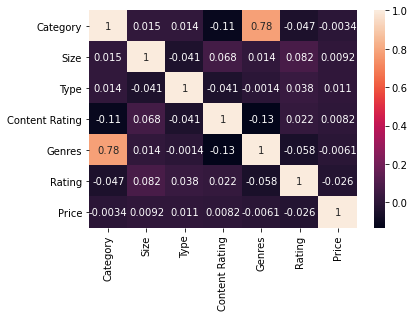

In [16]:
new_frame = clean_df[clean_df.columns[1:]]
correlation_mat = new_frame.corr()
sns.heatmap(correlation_mat, annot=True)
plt.show()

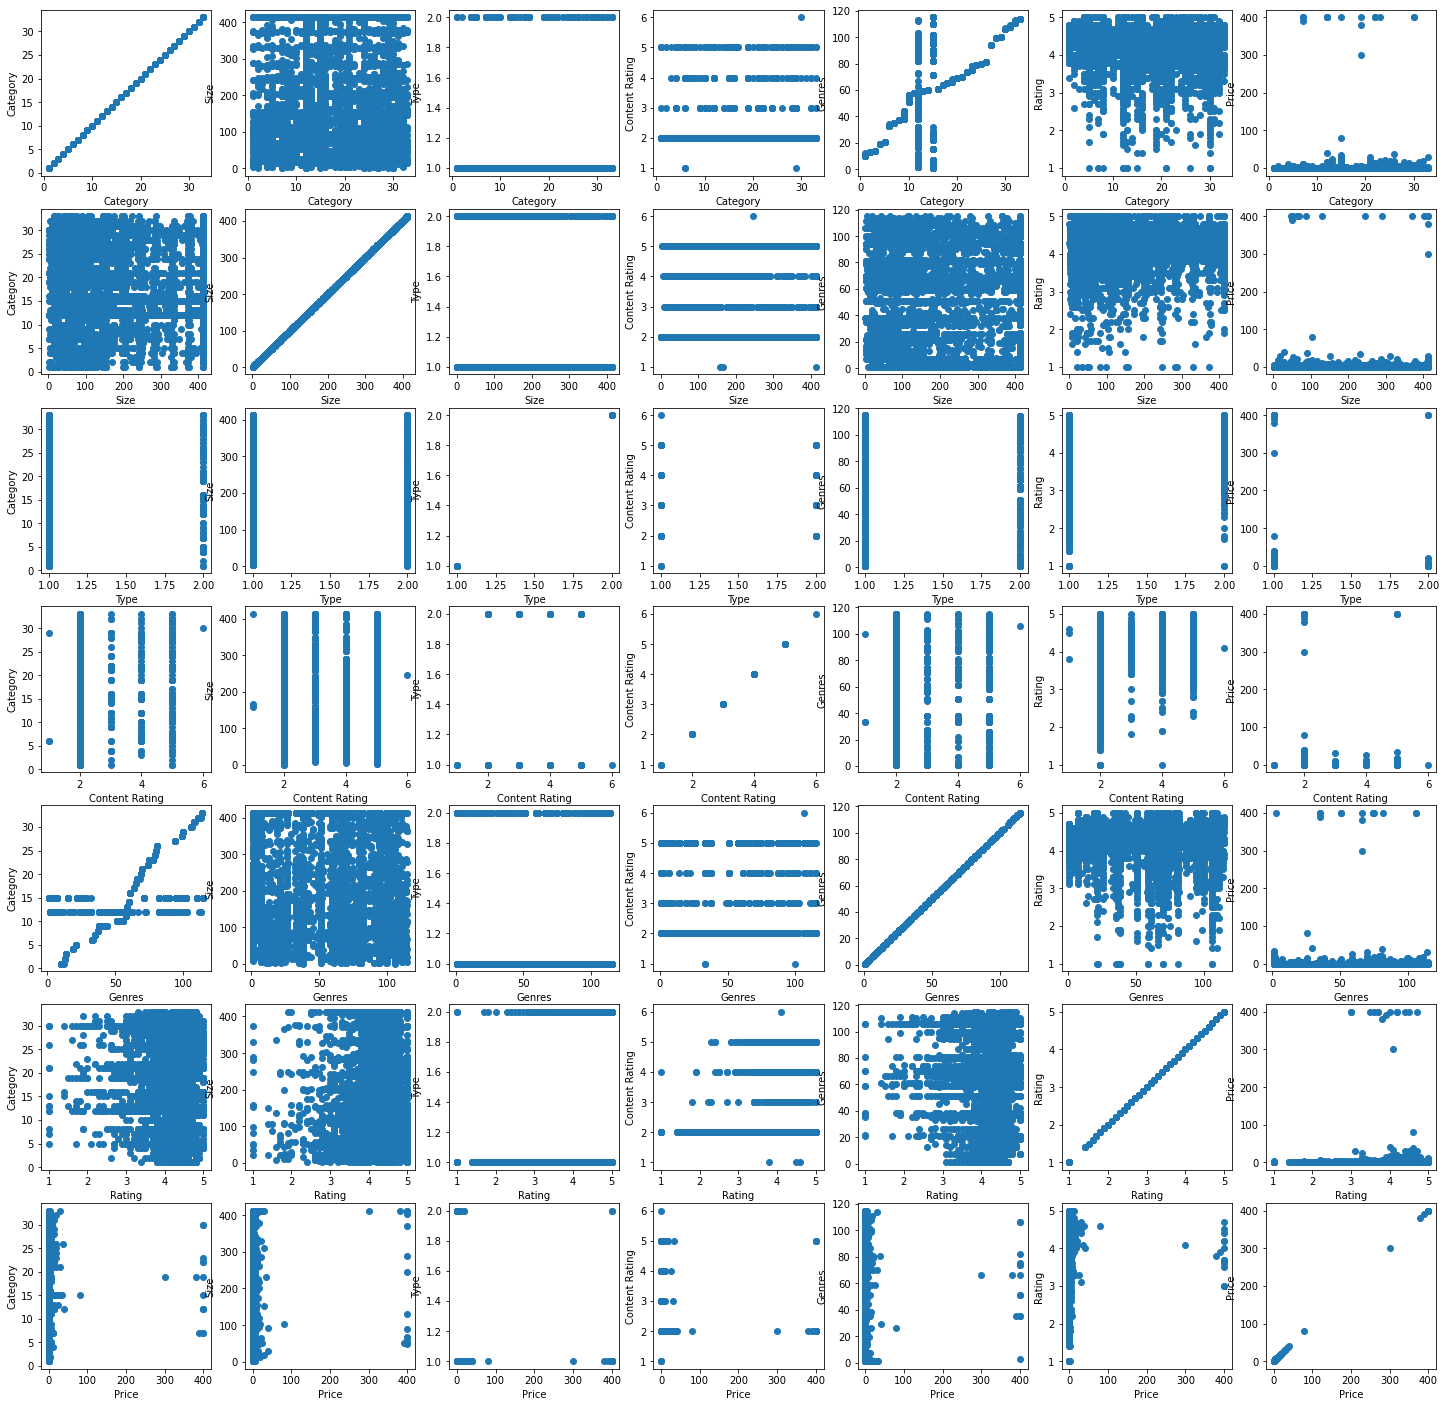

In [17]:
fig, axis = plt.subplots(7, 7, figsize = (25,25))

for ind1, i in enumerate(new_frame.columns):
    for ind2, j in enumerate(new_frame.columns):
        x = new_frame[i]
        y = new_frame[j]
        axis[ind1, ind2].scatter(x,y)
        axis[ind1, ind2].set_xlabel(i)
        axis[ind1, ind2].set_ylabel(j)
plt.show()


In [18]:
for column in clean_df.columns:
    print(colored('Does column {} have NaN ?'.format(i), 'blue'))
    print(df[column].isnull().values.any())


Does column Price have NaN ?
False
Does column Price have NaN ?
False
Does column Price have NaN ?
False
Does column Price have NaN ?
False
Does column Price have NaN ?
False
Does column Price have NaN ?
False
Does column Price have NaN ?
False
Does column Price have NaN ?
False


In [19]:
print(colored('Columns with finite values return True:', 'green'))
for i in clean_df.columns[1:]:
    print(i,'--------', np.all(np.isfinite(clean_df[i])))

Columns with finite values return True:
Category -------- True
Size -------- True
Type -------- True
Content Rating -------- True
Genres -------- True
Rating -------- True
Price -------- True


In [20]:
cluster_df = clean_df[clean_df.columns[1:]]
kmeans = KMeans(n_clusters=4).fit(cluster_df)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 18.09047845  39.55187115   1.07531975   2.39554713  64.02368546
    4.16049266   1.40688773]
 [ 18.31768775 395.89970356   1.05237154   2.56126482  65.2243083
    4.26067194   1.42823617]
 [ 17.01416431 242.39093484   1.07082153   2.48796034  59.32577904
    4.21954674   0.89962465]
 [ 17.35409836 128.76885246   1.08032787   2.45901639  61.17704918
    4.17098361   0.57991257]]


In [21]:
df = pd.read_csv('./googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
clean_df['Rating'].dtype

dtype('float64')

In [23]:
x = clean_df['Rating']
y =clean_df['Price']

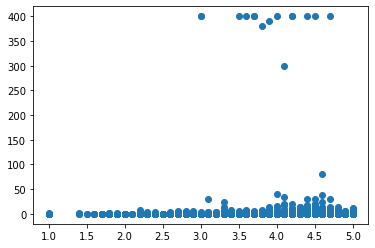

In [24]:
plt.scatter(x,y)
plt.show()

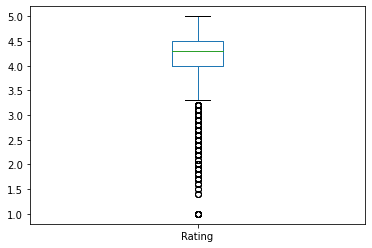

In [28]:
new = pd.DataFrame()
new['Price'] = clean_df['Price']
new['Rating'] = clean_df['Rating']
new['Rating'].plot.box()
plt.show()

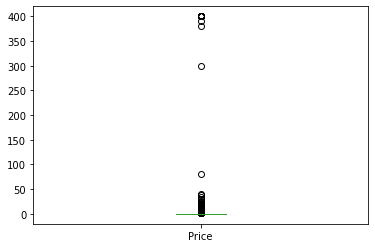

In [26]:
new['Price'].plot.box()
plt.show()

In [29]:
print('Number of free apps: ',np.sum(new['Price'])/len(new['Price']))

Number of free apps:  1.1105056255930594


In [30]:
print("maximum price at 0.997 quantile: ",new['Price'].quantile(0.997))

maximum price at 0.997 quantile:  29.35000000000149


## Adjustment 1

In [31]:
new = new[new['Price'].between(new['Price'].quantile(0), new['Price'].quantile(0.997))]

In [ ]:
len(new)

In [ ]:
plt.scatter(new['Rating'],new['Price'])
plt.title("The correlation of new Price vs. Rating")
plt.show()

In [ ]:
new2 = pd.DataFrame()
new2['Size'] = clean_df['Size']
new2['Rating'] = clean_df['Rating']

In [ ]:
new2['Size'].plot.box()
plt.show()

In [ ]:
new2['Rating'].plot.box()
plt.show()

Plot below shows that regardless of the size, people tend to give higher ratings overall

In [ ]:
plt.scatter(new2['Rating'],new2['Size'])
plt.show()

In [ ]:
new3 = pd.DataFrame()
new3['Category'] = clean_df['Category']
new3['Rating'] = clean_df['Rating']

In [ ]:
plt.scatter(new3['Rating'],new3['Category'])
plt.show()